## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
pwd

'/content'

## 1 Loading the dataset

In [3]:
df=pd.read_csv('Churn_Modelling.csv')


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Pre processing

In [7]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


## Descriptive Statistics

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## 2 Visualiztaion

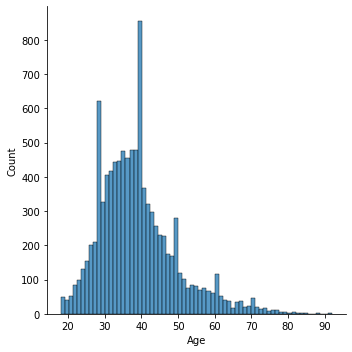

In [13]:
sns.displot(df.Age)

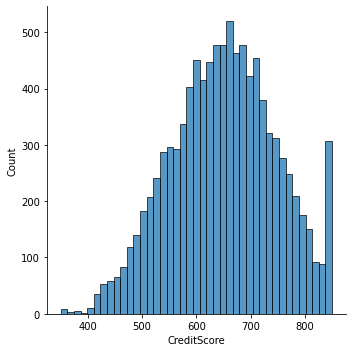

In [14]:
sns.displot(df.CreditScore)

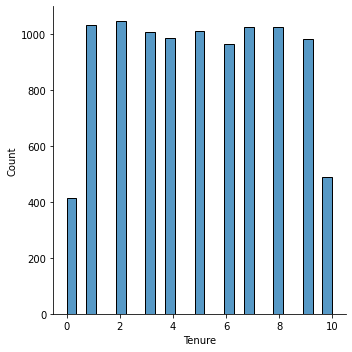

In [15]:
sns.displot(df.Tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


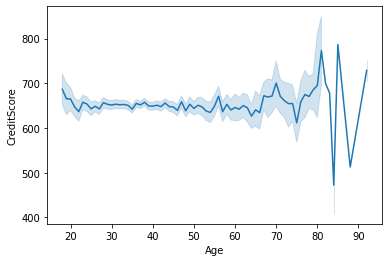

In [16]:
sns.lineplot(df.Age,df.CreditScore)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


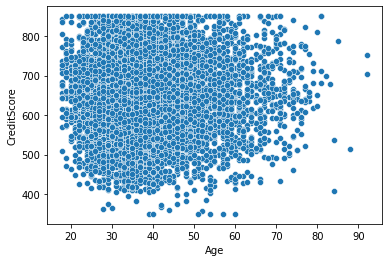

In [17]:
sns.scatterplot(df.Age,df.CreditScore)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


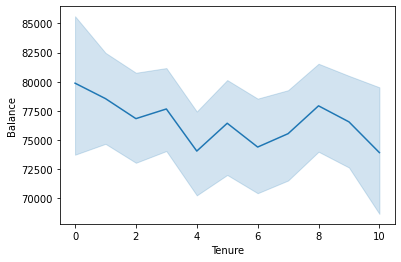

In [18]:
sns.lineplot(df.Tenure,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


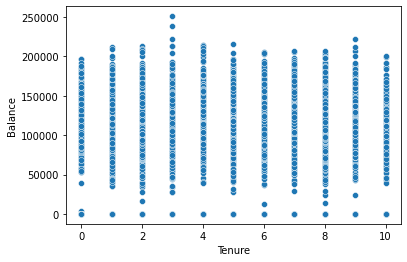

In [19]:
sns.scatterplot(df.Tenure,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


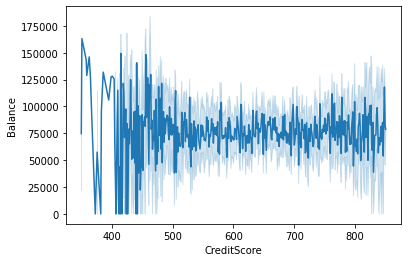

In [20]:
sns.lineplot(df.CreditScore,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


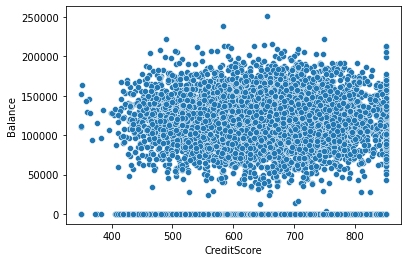

In [21]:
sns.scatterplot(df.CreditScore,df.Balance)

Text(0.5, 1.0, 'HasCrCard')

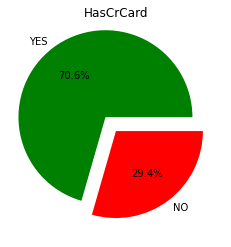

In [22]:
plt.pie(df.HasCrCard.value_counts(),[0.2,0],labels=['YES','NO'],autopct="%1.1f%%",colors=['green','red'])
plt.title('HasCrCard')

In [23]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


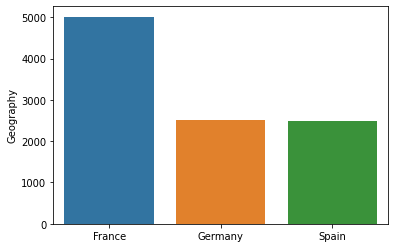

In [24]:
sns.barplot(df.Geography.value_counts().index,df.Geography.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


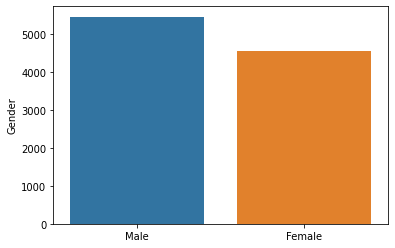

In [25]:
sns.barplot(df.Gender.value_counts().index,df.Gender.value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc67cbaa8d0>,
      dtype=object)

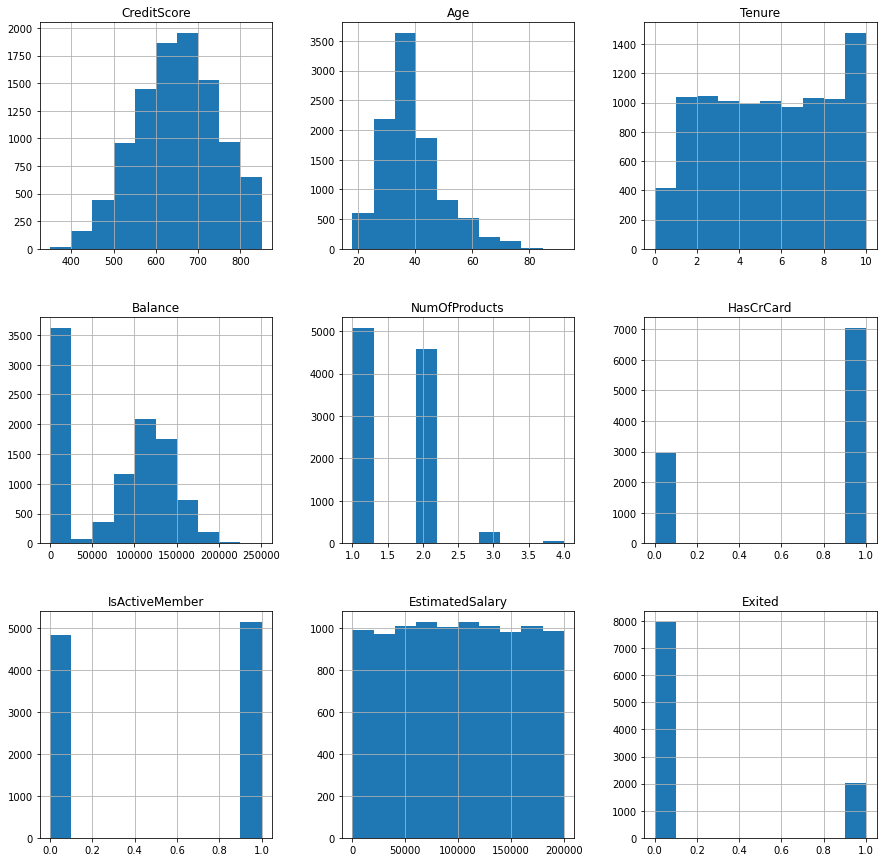

In [26]:
df.hist(figsize=(15,15))

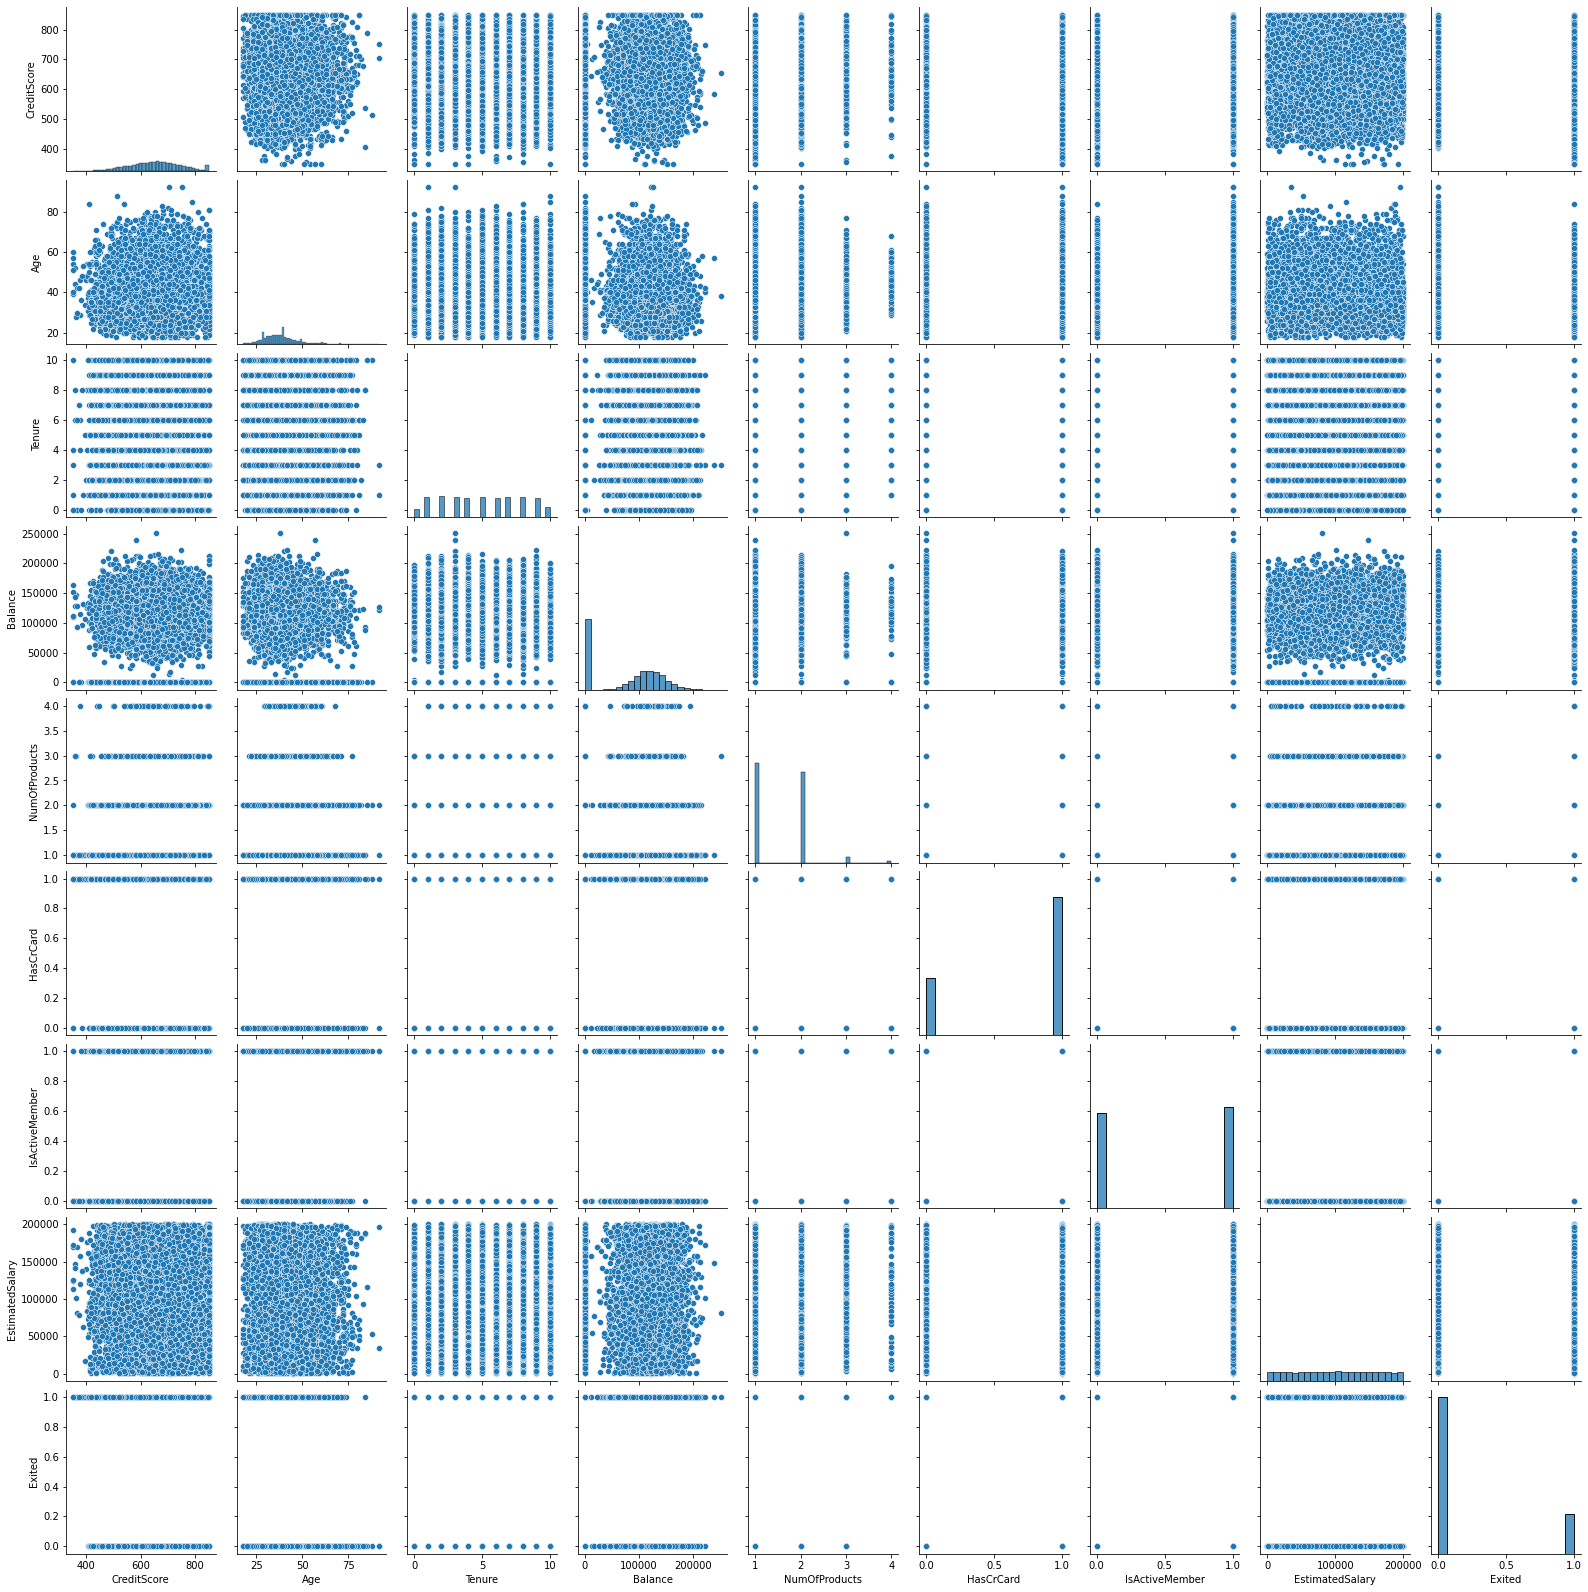

In [27]:
sns.pairplot(df)

Text(0.5, 1.0, 'Geography')

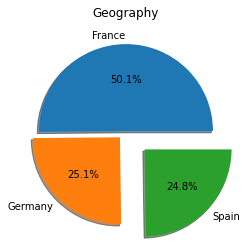

In [28]:
plt.pie(df.Geography.value_counts(),[0,0.1,0.3],shadow=True,labels=['France','Germany','Spain'],autopct="%1.1f%%")
plt.title('Geography')

## Handling Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


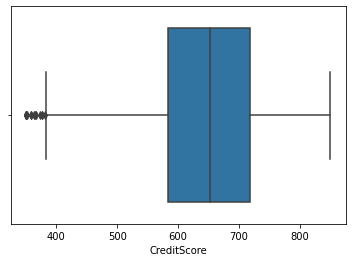

In [29]:
sns.boxplot(df.CreditScore)

In [30]:
q1=df.CreditScore.quantile(0.25)  #(Q1)
q3=df.CreditScore.quantile(0.75)  #(Q3)

In [31]:
IQR=q3-q1

In [32]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [33]:
upper_limit

919.0

In [34]:
lower_limit

383.0

In [35]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64

In [36]:
df['CreditScore']= np.where(df['CreditScore']<lower_limit,6.520000e+02,df['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


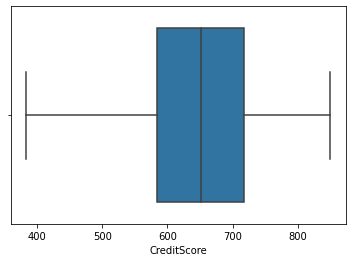

In [37]:
sns.boxplot(df.CreditScore)

## LabelEncoding

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
df.Gender=le.fit_transform(df.Gender)

In [41]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,0,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,0,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645.0,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822.0,France,1,50,7,0.00,2,1,1,10062.80,0
7,652.0,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501.0,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684.0,France,1,27,2,134603.88,1,1,1,71725.73,0


## One hot Encoding

In [42]:
df_main=pd.get_dummies(df,columns=['Geography'])
df_main.head(15)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608.0,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502.0,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699.0,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645.0,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822.0,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,652.0,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501.0,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684.0,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [43]:
df_main.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.003613,-0.001992,-0.000650,0.007074,0.012293,-0.003942,0.023596,0.001619,-0.018298,-0.009889,0.005748,0.005681
Gender,-0.003613,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Age,-0.001992,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
Tenure,-0.000650,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.007074,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012293,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.003942,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.023596,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,0.001619,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.018298,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


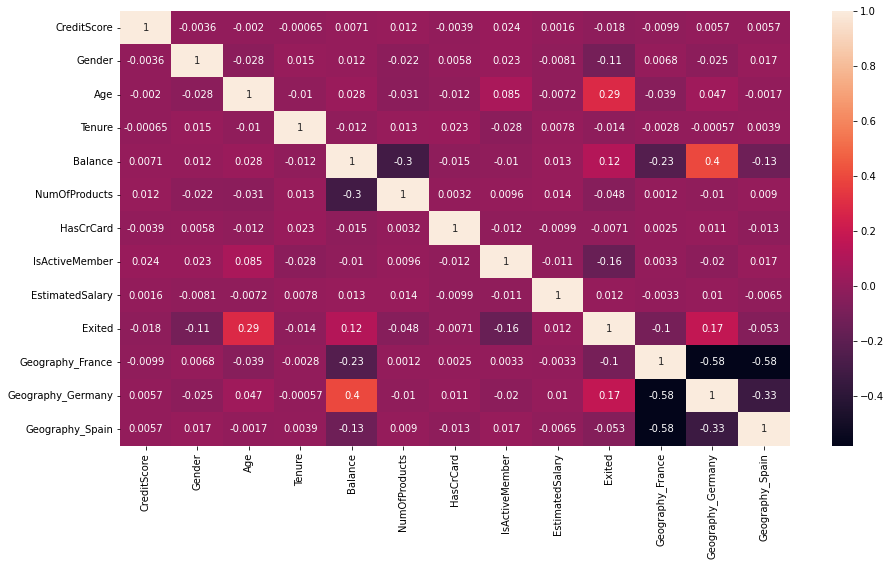

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df_main.corr(),annot=True)

In [45]:
df_main.corr().Exited.sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.018298
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [46]:
df_main.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608.0,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502.0,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699.0,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## X and Y split

In [47]:
# dependent variable

y=df_main['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [48]:
#independent variable

X=df_main.drop(columns=['Exited'],axis=1)
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619.0,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608.0,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502.0,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699.0,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850.0,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645.0,1,44,8,113755.78,2,1,0,149756.71,0,0,1
6,822.0,1,50,7,0.00,2,1,1,10062.80,1,0,0
7,652.0,0,29,4,115046.74,4,1,0,119346.88,0,1,0
8,501.0,1,44,4,142051.07,2,0,1,74940.50,1,0,0
9,684.0,1,27,2,134603.88,1,1,1,71725.73,1,0,0


##  Scaling

In [51]:
from sklearn.preprocessing import scale

In [52]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.332983,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809
1,-0.447572,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740
2,-1.551792,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809
3,0.500391,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809
4,2.073384,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740


## Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [54]:
X_train.shape

(7000, 12)

In [55]:
y_train.shape

(7000,)

In [56]:
X_test.shape

(3000, 12)

In [57]:
y_test.shape

(3000,)